In [1]:
from qutip import *
from qutip.operators import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from cython import *

In [2]:
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
f  = 0.7 * 2 * np.pi  # external field

Ec = wa
Ej = 2.5*Ec
ng = 0
n_th_a = 0.0           # temperature in frequency units

tlist = np.linspace(0,50,5000)

In [3]:
psi0 = basis(2,0)


Bz = Ec*(1-2*ng)
Bx = Ej
Hq = -Bz * sigmaz() / 2 - Bx * sigmax() / 2
Hf = f  * sigmaz()

Hf_coeff_cython = "sin(t * w + phi)"
Args = {'w' : 1.5*wa, 'phi' : 0}

def Hf_coeff_python(t, args):
    return np.sin(t * args['w'] + args['phi'])


In [4]:
c_op_list = []

gamma_relax = 0.02
gamma_dephase = 0.02


rate = gamma_relax
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sigmam().dag())

rate = gamma_dephase/2
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sigmaz())

In [5]:
%%time
H = [Hq, [Hf, Hf_coeff_cython]]
output = mesolve(H, psi0, tlist, c_op_list, [sigmam().dag()*sigmam()], args = Args)

/usr/local/lib/python3.4/dist-packages/Cython/Distutils/old_build_ext.py:30: UserWarning: Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.
  "Cython.Distutils.old_build_ext does not properly handle dependencies "


CPU times: user 1.2 s, sys: 40 ms, total: 1.24 s
Wall time: 2.27 s


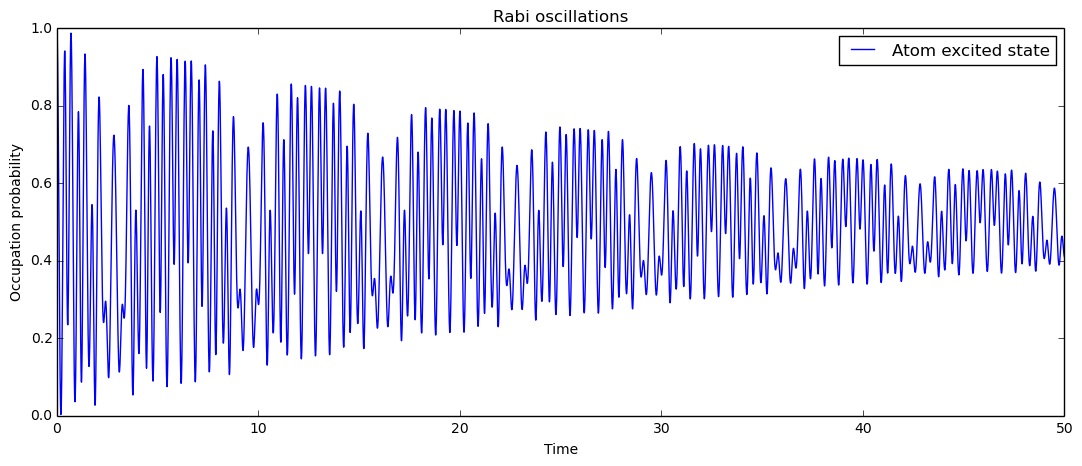

In [6]:
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(tlist, output.expect[0], label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Rabi oscillations');